# Introduction
In this exercise, we will focus on the following issues.   
- Simple Linear Regression
- Multiple Linear Regression
- Polynomial Regression
- Encoding of Categorical Values
- Diagnosing Bias vs. Variance

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

##### Regression analysis is the process of constructing a mathematical model or function that can be used to predict or determine one variable by another variable or other variables.**  
   
------
There are some types of regression models.

- Simple linear regression models predict the outcome/response variable y from only one predictor variable x. 
- Multiple linear Regression models predict outcome/response variable y from several predictor variables 𝑥1, 𝑥2,…,𝑥𝑘. 
- Polynomial regression models are regression models that are second- or higher-order models are. 

Let's start with Simple linear regression.
First, we generated a toy data set and visualized it.

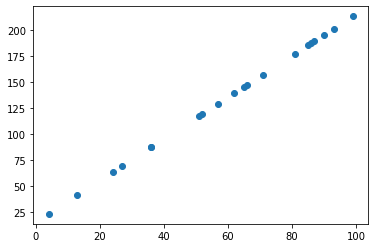

In [2]:
np.random.seed(41)
n = 20
x = np.random.randint(low=1,high=100,size=n) # generate n random number between 1 and 100
y = 15 + 2*x ## synthetic data is created
plt.scatter(x,y)

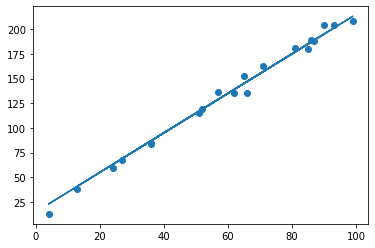

In [3]:
np.random.seed(1)
e = np.random.normal(loc=0, scale=5,size=n).round(0)
y = 15 + 2*x + e # noise is added to y
plt.scatter(x,y)
plt.plot(x, 15+2*x)

## Simple Linear Regression

<font color=#C91414>***LinearRegression***</font> fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

- fit() method fits a linear model.  
- predict() method predicts y values by using the fitted linear model.    
- You can derive the predicted y formula from intercept_ and coef_  &rarr;   &ycirc;=9.79+2.08*x

You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).  


intercept= 9.78975759869661 coefficients= [2.07696612]


x      y        pred     error
0  65  153.0  144.792555  8.207445
1  36   84.0   84.560538 -0.560538
2  13   38.0   36.790317  1.209683
3  99  208.0  215.409403 -7.409403
4  81  181.0  178.024013  2.975987

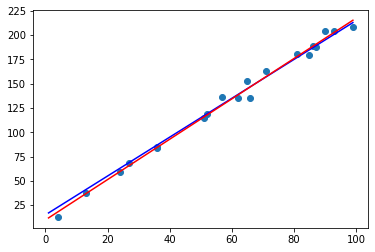

In [4]:
data1 = pd.DataFrame({'x': x, 'y': y})
model1 = LinearRegression()
model1.fit(data1[['x']],data1['y']) #Fit linear model
print('intercept=', model1.intercept_, 'coefficients=', model1.coef_)
plt.scatter(x,y)
xx = np.arange(1,100,1) ## xx takes values 1 to 100
plt.plot(xx, 15+2*xx, c='blue')
plt.plot(xx, model1.intercept_ + model1.coef_[0]*xx, c='red') ## Predict using the linear model.
data1['pred'] = model1.predict(data1[['x']])
data1['error'] = data1['y'] - data1['pred']
display(data1.head())

## Multiple Linear Regression

Again, here we created a synthetic data set. In this example, there are three predictors; therefore, it is called multiple linear regression.
Model fitting and prediction steps are very similar to the previous example, but this time there are three features, namely x1,x2, and x3.   
&ycirc;= 6.32+ 0.254*x1 + 0.700*x2 + 0.083*x3

In [5]:
np.random.seed(8)
n = 10 #number of observations
x1 = np.random.randint(low=1, high=100, size=n)
x2 = np.random.randint(low=25, high=50, size=n)
x3 = np.random.randint(low=-5, high=5, size=n) 
e = np.random.randint(low=-1,high=1,size=n).round(2) ## noise term 
y = 5 + 0.25*x1 + 0.75*x2 + 0.1*x3 + e ## synthetic data is created
data2 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
display(data2.head())

x1  x2  x3      y
0  68  42   1  52.60
1  85  44   3  59.55
2   6  35   4  33.15
3  91  37  -2  55.30
4   9  38  -1  34.65

In [6]:
model2 = LinearRegression()
model2.fit(data2[['x1','x2','x3']], data2['y']) ## regression model is fitted
print('intercept=', model2.intercept_, 'coefficients=', model2.coef_) ##since there are three predictors, .coef_ returns three values in an array
data2['pred'] = model2.predict(data2[['x1', 'x2', 'x3']])
data2['error'] = data2['y'] - data2['pred'] ## difference between real values and predicted values is called as error
display(data2.head())

intercept= 6.320613277302449 coefficients= [0.25474851 0.70003532 0.08339131]


x1  x2  x3      y       pred     error
0  68  42   1  52.60  53.128387 -0.528387
1  85  44   3  59.55  59.025964  0.524036
2   6  35   4  33.15  32.683906  0.466094
3  91  37  -2  55.30  55.237252  0.062748
4   9  38  -1  34.65  35.131301 -0.481301

## Categorical Values: 
### Label Encoding and One Hot Encoding

The regression model is based on a mathematical formula. Consider the previous example above. For x1 = 68, x2 = 42 and x3 = 1, we can calculate y as 53.12 based on the formula below.   
&ycirc;= 3.66+ 0.251*x1 + 0.775*x2 + 0.116*x3

So, if x1 was a categorical variable rather than a numeric variable, how would we apply this formula? 
Let's think about it, we try to predict car sale prices and let's say x1 shows the color of the cars in your data set. Can we multiply 0.251 with red or blue?

**We need to convert the categorical values to numeric values before built regression models.**

In [7]:
n = 10000
# create a dataframe that contains categorical values. 
x1 = np.random.randint(low=1,high=100,size=n)
x2 = np.random.choice(a=['available', 'not_available'], p=[0.6, 0.4], size=n)
x3 = np.random.choice(a=['red', 'green', 'blue'], p = [0.5,0.3,0.2], size=n)
y = 10 + 0.5*x1 + np.random.normal(loc=0, scale=20, size=n) #intercept+error
y[x2=='available'] += 40 # add available->40, not_available->0
y[x3=='red'] += 20 # add red->20, green->10, blue->0
y[x3=='green'] += 10
y[x3=='blue'] += 0
data3 = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
data3.head()

x1             x2    x3          y
0  64      available  blue  22.600494
1  87      available   red  90.302397
2  32  not_available   red  63.116684
3  21      available   red  64.428002
4  46  not_available  blue  13.420141

<font color=#C91414>***LabelEncoder***</font> encodes labels with values between 0 and n_classes-1.

fit_transform() method fits label encoder and return encoded labels.

For example, there are two categories of x2 and they are encoded as 0 and 1. Similarly, there are 3 categories of x3 and they are encoded as 0,1 and 2.  

You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).  


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
data3_le = data3.copy()
data3_le['x2_l'] = label_encoder.fit_transform(data3['x2']) 
data3_le['x3_l'] = label_encoder.fit_transform(data3['x3']) 
display(data3_le.head())


x1             x2    x3          y  x2_l  x3_l
0  64      available  blue  22.600494     0     0
1  87      available   red  90.302397     0     2
2  32  not_available   red  63.116684     1     2
3  21      available   red  64.428002     0     2
4  46  not_available  blue  13.420141     1     0

LabelEncoder transfers data from text to integer and it gives an arbitrary ordering, but maybe there is no ordering relationship with the data categories. However, the model can misunderstand the relationship with categories and think data is in order i.e., 0<1<2. At this point, one hot encoding comes to play.  


<font color=#C91414>***OneHotEncoder***</font> encodes categorical features as a one-hot numeric array.
The features are encoded using a one-hot encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array. By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually.

fit_transform() method fits OneHotEncoder to X, then transform X.    
drop parameter specifies a methodology to use to drop one of the categories per feature.    

You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). 

In [9]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop=['not_available', 'blue']) # will not create ind. variables for 'not_available' and 'blue'
encoded = onehot_encoder.fit_transform(data3[['x2','x3']])
data3_newpredictors = onehot_encoder.get_feature_names(['x2', 'x3'])
data3_add = pd.DataFrame(encoded.toarray(), columns=data3_newpredictors)
data3_ohe = data3.merge(data3_add, left_index=True, right_index=True)
data3_predictors = ['x1'] + list(data3_newpredictors)
print('predictors:', data3_predictors)
display(data3_ohe.head())

#### x3_green=0 & x3_red=0 >> x3 is not green & x3 is not red >> means that x3 is blue

predictors: ['x1', 'x2_available', 'x3_green', 'x3_red']


x1             x2    x3          y  x2_available  x3_green  x3_red
0  64      available  blue  22.600494           1.0       0.0     0.0
1  87      available   red  90.302397           1.0       0.0     1.0
2  32  not_available   red  63.116684           0.0       0.0     1.0
3  21      available   red  64.428002           1.0       0.0     1.0
4  46  not_available  blue  13.420141           0.0       0.0     0.0

In [10]:
model3 = LinearRegression()
model3.fit(data3_ohe[data3_predictors], data3_ohe['y']) 
print('intercept=', model3.intercept_, 'coefficients=', list(zip(data3_predictors, model3.coef_)))
data3_ohe['pred'] = model3.predict(data3_ohe[data3_predictors])
data3_ohe['error'] = data3_ohe['y'] - data3_ohe['pred']
display(data3_ohe.head())

intercept= 10.369218006350607 coefficients= [('x1', 0.48641617213495647), ('x2_available', 39.940966409167714), ('x3_green', 10.67738898786703), ('x3_red', 20.564538945058302)]


x1             x2    x3          y  x2_available  x3_green  x3_red  \
0  64      available  blue  22.600494           1.0       0.0     0.0   
1  87      available   red  90.302397           1.0       0.0     1.0   
2  32  not_available   red  63.116684           0.0       0.0     1.0   
3  21      available   red  64.428002           1.0       0.0     1.0   
4  46  not_available  blue  13.420141           0.0       0.0     0.0   

         pred      error  
0   81.440819 -58.840325  
1  113.192930 -22.890533  
2   46.499074  16.617610  
3   81.089463 -16.661461  
4   32.744362 -19.324221

## Polynomial Regression

Polynomial regression models are regression models that are second- or higher-order models.  They contain squared, cubed, or higher powers, or interaction (multiplication) of the predictor variable(s). Therefore, polynomial features and interactions are added to the data, and then the regression model is fitted. 


<font color=#C91414>***PolynomialFeatures***</font> generates a new feature matrix consisting of all polynomial combinations of the features with a degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

fit_transform() method fits transformer to data, then returns the transformed version of the data.   
get_feature_names() method returns feature names for output features

You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). 



x   x^2     x^3           y
0   4    16      64   -1.363010
1  33  1089   35937  137.729315
2  98  9604  941192  849.080779
3  42  1764   74088  197.194441
4   9    81     729   33.301141

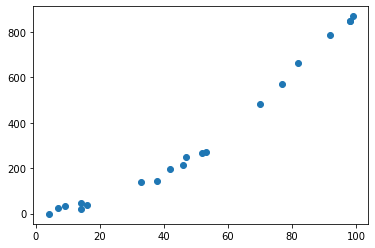

In [11]:
##Let's generate a data set and visualize it.
n = 20
x = np.random.randint(low=1, high=100, size=n)
y = 5 + 2*x + 0.05*x*x + 0.0002*x*x*x + np.random.normal(0,20,n)
data4 = pd.DataFrame({'x': x, 'x^2': x*x, 'x^3': x*x*x, 'y': y}) ## synthetic data is created
display(data4.head())
plt.scatter(x,y)

intercept= 22.168689944630614 coefficients= [-1.27955060e+00  1.43621289e-01 -4.45643034e-04]


x   x^2     x^3           y        pred      error
0   4    16      64   -1.363010   19.319907 -20.682917
1  33  1089   35937  137.729315  120.332031  17.397284
2  98  9604  941192  849.080779  856.675935  -7.595156
3  42  1764   74088  197.194441  188.758718   8.435723
4   9    81     729   33.301141   21.961185  11.339955

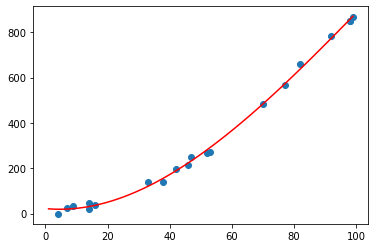

In [12]:
model4 = LinearRegression()
model4.fit(data4[['x', 'x^2', 'x^3']], data4['y']) 
print('intercept=', model4.intercept_, 'coefficients=', model4.coef_)
plt.scatter(x,y)
x_ = np.arange(1,100)
plt.plot(x_, model4.intercept_ + model4.coef_[0]*x_ + model4.coef_[1]*x_*x_ + model4.coef_[2]*x_*x_*x_, c='red')
data4['pred'] = model4.predict(data4[['x', 'x^2', 'x^3']])
data4['error'] = data4['y'] - data4['pred']
display(data4.head())

# Polynomial Regression (multiple variables)

In [13]:
n = 1000
x0 = np.random.randint(low=1, high=100, size=n)
x1 = np.random.randint(low=25, high=50, size=n)
e = np.random.normal(0,10,size=n).round(2)
y = 5 + 0.25*x0 + 0.75*x1 + 0.001*x0*x0 + 0.05*x0*x1 + e ## synthetic data is created
data5 = pd.DataFrame({'x0': x0, 'x1': x1, 'y': y})
display(data5.head())

x0  x1        y
0  48  43  144.584
1  97  25  163.669
2  11  33   43.541
3  38  37  115.914
4  94  44  282.886

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False) ### Generate polynomial and interaction features
poly_features = poly.fit_transform(data5[['x0', 'x1']])
data5_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names())
data5_poly.head()

x0    x1    x0^2   x0 x1    x1^2
0  48.0  43.0  2304.0  2064.0  1849.0
1  97.0  25.0  9409.0  2425.0   625.0
2  11.0  33.0   121.0   363.0  1089.0
3  38.0  37.0  1444.0  1406.0  1369.0
4  94.0  44.0  8836.0  4136.0  1936.0

In [15]:
model5 = LinearRegression()
model5.fit(data5_poly, data5['y'])
print('intercept=', model5.intercept_, 'coefficients=', list(zip(data5_poly.columns,model5.coef_)) )
data5['pred'] = model5.predict(data5_poly)
data5['error'] = data5['y'] - data5['pred']
display(data5.head())

intercept= 2.47622114327919 coefficients= [('x0', 0.2622252574347178), ('x1', 0.8196466586984886), ('x0^2', 0.0010271827405589097), ('x0 x1', 0.049238615282237934), ('x1^2', 0.0003523798077569696)]


x0  x1        y        pred      error
0  48  43  144.584  154.954521 -10.370521
1  97  25  163.669  177.691879 -14.022879
2  11  33   43.541   50.790687  -7.249687
3  38  37  115.914  113.962860   1.951140
4  94  44  282.886  276.599155   6.286845

### Bias-Variance

**Bias:** the difference between the average prediction of our model and the correct value which we are trying to predict.   
High bias means the model does not fit to the training data well. That is, the model is an oversimplification. High bias causes high error on training and test data.   

**To fix high bias (underfit), you can**     

- get additional features
- add polynomial features

**Variance:** Variability of the model prediction for a given data point.
High variance means the model overfits the training data and it does not generalize.
High variance causes a small error on training data but a large error on test data.

**To fix high variance (overfit), you can**  
- get more training example
- try a smaller set of features
--------



### Polynomial Regression Example

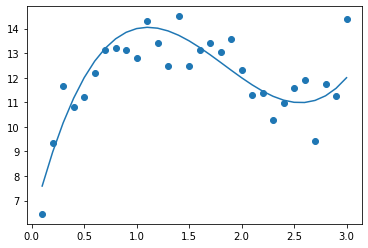

In [16]:
n = 30
test_size = 10
train_size = n - test_size
x = np.arange(0.1,  0.01+n*0.1, 0.1)
y_noerror = 6 + 17*x - 11*x*x + 2*x*x*x  
plt.plot(x,y_noerror)
np.random.seed(111)
y = y_noerror + np.random.normal(loc=0,scale=1,size=n) # try scale=1 and scale=100
plt.scatter(x,y)
data6 = pd.DataFrame({'x': x, 'y': y})

In [17]:
## This function generates polynomial and interaction features and add the data then fits polynomial regression
def fit_poly(degree, data, model=LinearRegression(), plot=False):
    poly = PolynomialFeatures(degree=degree, include_bias=False) # try degree = 1..10  
    pf = poly.fit_transform(data[['x']])  ## creates polynomial features with given degree
    X = pd.DataFrame(pf, columns=poly.get_feature_names())

    X_train, X_test, y_train, y_test = train_test_split(X,data['y'],test_size=test_size,random_state=11) ##split data as train and test
    #model = linear_model.LinearRegression()
    model.fit(X_train, y_train)

    if plot:
        #display(X.head())
        #print(model.intercept_, model.coef_)
        x_m = np.arange(0.1,n*0.1+0.001,0.01)
        y_m = []
        for x_ in x_m:
            y_ = model.intercept_
            for j,c in enumerate(model.coef_):
                y_ += c * x_**(j+1)
            y_m.append(y_)
        plt.plot(x_m, y_m, color='black') ## shows model with black line
        plt.scatter(X_train.x0,y_train, c='blue') ## shows train data with blue dots
        plt.scatter(X_test.x0,y_test,c='red') ## shows test data with red dots

    train_error = metrics.mean_squared_error(y_train,model.predict(X_train))
    test_error = metrics.mean_squared_error(y_test,model.predict(X_test))
    R2 = model.score(X_train,y_train)

    return R2, train_error, test_error, model



In [18]:
columns = ['R2', 'Error(train)', 'Error(test)', 'model']
results = []
degrees = range(1,20)
for d in degrees:
    results.append(fit_poly(degree=d, data=data6))
pd.DataFrame(results, index=degrees, columns=columns)

R2  Error(train)  Error(test)               model
1   0.103566      3.064125     2.518797  LinearRegression()
2   0.379387      2.121334     1.447413  LinearRegression()
3   0.790025      0.717723     0.966999  LinearRegression()
4   0.796405      0.695914     0.874008  LinearRegression()
5   0.830274      0.580147     0.582169  LinearRegression()
6   0.843198      0.535970     0.706506  LinearRegression()
7   0.863043      0.468136     0.756079  LinearRegression()
8   0.866373      0.456755     0.841029  LinearRegression()
9   0.929561      0.240771     1.060388  LinearRegression()
10  0.942520      0.196474     1.315483  LinearRegression()
11  0.950020      0.170840     1.387672  LinearRegression()
12  0.953649      0.158433     1.528716  LinearRegression()
13  0.955121      0.153403     1.480653  LinearRegression()
14  0.955138      0.153343     1.437178  LinearRegression()
15  0.979078      0.071516    10.026675  LinearRegression()
16  0.973404      0.090907     4.375545  LinearRegression()
17  0.996052      0.013494    39.199592  LinearRegression()
18  0.994847      0.017612    20.967134  LinearRegression()
19  0.992706      0.024932    12.920629  LinearRegression()

R2 which tells us how much variance is explained by the model compared to how much variance there is to explain in the first place. It is the proportion of variance in the outcome variable that is shared by the predictor variable.
In below example, 
- R2 is very high.
- Etrain is very small, but E test is high. 
- If you look at the graph, you can see that model overfits the train data.
- All train data(blue dots) is on the model line but, test data is not.

f(x)= 6 + 17*x - 11*x*x + 2*x*x*x
Coeff=-710.4506741447458,[ 1.86918651e+04 -1.91779688e+05  1.04180751e+06 -3.35871238e+06
  6.72908189e+06 -8.19573522e+06  4.75977141e+06  2.13500839e+06
 -7.36795520e+06  7.89176007e+06 -5.22029303e+06  2.37062666e+06
 -7.56683238e+05  1.67718422e+05 -2.46590226e+04  2.16679853e+03
 -8.62349354e+01]
R2=0.9960520905995476
Error(train)=0.013494460735697622
Error(test)=39.199591999597736


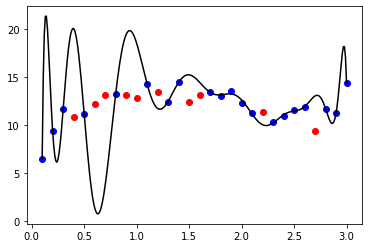

In [19]:

R2, Etrain, Etest, model = fit_poly(degree=17, data=data6, plot=True)
print('f(x)= 6 + 17*x - 11*x*x + 2*x*x*x')
print(f'Coeff={model.intercept_},{model.coef_}\nR2={R2}\nError(train)={Etrain}\nError(test)={Etest}')

In the below example,
- R2 is too smaller than the previous example.
- Etrain is very greater than the previous one 
- E test is smaller than the previous one 
- If you look at the graph, you can see that model more generalize the data
- Some of the train data on the model line, and some test data are very close to the model line.

f(x)= 6 + 17*x - 11*x*x + 2*x*x*x
Coeff=9.021313448535496,[ 4.12991947e+00  3.88756347e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.16588143e-01 -3.87122473e-04  2.99580789e-02
  4.81286992e-03  2.28204826e-04 -2.54030398e-04 -1.36811119e-04
 -4.61610495e-05 -1.12716087e-05 -1.28221570e-06  6.56815332e-07
  6.35075821e-07]
R2=0.7267065304915228
Error(train)=0.9341521345910587
Error(test)=0.7622963218194758


C:\Users\Ece\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.111901858569638, tolerance: 0.006836256543349879
  positive)


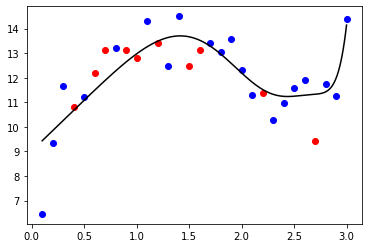

In [20]:
R2, Etrain, Etest, model = fit_poly(degree=17, data=data6, plot=True, model=linear_model.Lasso(alpha=0.1,max_iter=100000))
print('f(x)= 6 + 17*x - 11*x*x + 2*x*x*x')
print(f'Coeff={model.intercept_},{model.coef_}\nR2={R2}\nError(train)={Etrain}\nError(test)={Etest}')

In the below example,
- R2 is the smallest among the three model
- Etrain is the largest among the three model
- E test is smaller than the first model but larger than the second model 
- If you look at the graph you can see that model underfits
- Most of the train is not on the model line
- Most of the test data aren't close to the model line

f(x)= 6 + 17*x - 11*x*x + 2*x*x*x
Coeff=11.44978274310026,[ 0.00000000e+00  0.00000000e+00  1.66257514e-01  1.74173770e-01
  0.00000000e+00  0.00000000e+00 -1.10273143e-02 -1.98383453e-02
  1.39220090e-03  2.42591968e-03  3.28755417e-04 -1.00023954e-05
 -2.78359389e-05 -1.09722066e-05 -2.50494029e-06 -1.46177325e-08
  3.72708406e-07]
R2=0.26278035064208805
Error(train)=2.5199113259045647
Error(test)=1.1912019072594702


C:\Users\Ece\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.933690128291104, tolerance: 0.006836256543349879
  positive)


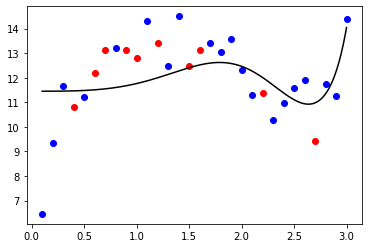

In [21]:
R2, Etrain, Etest, model = fit_poly(degree=17, data=data6, plot=True, model=linear_model.Lasso(alpha=0.5,max_iter=100000))
print('f(x)= 6 + 17*x - 11*x*x + 2*x*x*x')
print(f'Coeff={model.intercept_},{model.coef_}\nR2={R2}\nError(train)={Etrain}\nError(test)={Etest}')

### Polynomial Regression Example with Inappropriate Train-Test Split

We should not evaluate the performance of a model on exactly the same datasets that were used to build it. Because evaluation on the same dataset provides no assessment of how well the model generalizes to unseen cases. Therefore, we split the dataset into train and test sets.   

<font color=#C91414>***train_test_split***</font> Split arrays or matrices into random train and test subsets.

You can see more details from [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

While splitting the data, we should make sure that both test and train datasets are representative of the data distribution. There is an example that shows how inappropriate train test splitting affects model performance.

-122.72664332242073 [48.70463062]


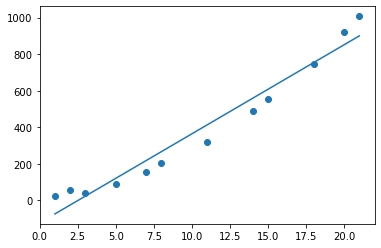

In [22]:
X = pd.DataFrame({'x':[1,2,3,5,7,8,11,14,15,18,20,21]})
y = 25 + 5*X.x + 2*X.x*X.x + np.random.normal(0,10,X.size)
model9 = LinearRegression()
model9.fit(X, y)
print(model9.intercept_, model9.coef_)
plt.scatter(X.x,y)
plt.plot(X.x,model9.predict(X), '-')

16.92790255207433 [6.91256637 1.90863555]


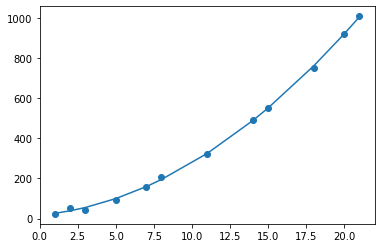

In [23]:
X2 = pd.DataFrame({'x': X.x,'x^2':X.x*X.x})
model10 = LinearRegression()
model10.fit(X2, y)
print(model10.intercept_, model10.coef_)
plt.scatter(X2.x,y)
plt.plot(X2.x,model10.predict(X2), '-')

intercept= -88.32821416421751 coefficient= 43.50281345437665
train error 2083.9993325369787
test error 10678.876794866335


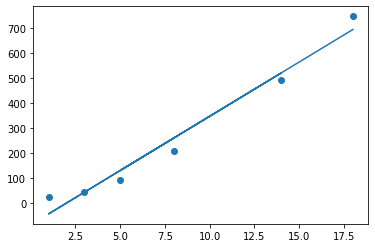

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
model11 = LinearRegression()
model11.fit(X_train, y_train)
print('intercept=', model11.intercept_, 'coefficient=', *model11.coef_)
plt.scatter(X_train.x,y_train)
y_train_pred = model11.predict(X_train)
plt.plot(X_train.x, y_train_pred, '-')
print('train error', metrics.mean_squared_error(y_train,y_train_pred))
print('test error', metrics.mean_squared_error(y_test,model11.predict(X_test)))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.5)
model12 = LinearRegression()
model12.fit(X_train, y_train)
print('intercept=', model12.intercept_, 'coefficients=', model12.coef_)
y_train_pred = model12.predict(X_train)
print('train error', metrics.mean_squared_error(y_train,y_train_pred))
print('test error', metrics.mean_squared_error(y_test,model12.predict(X_test)))


intercept= 23.067781910421786 coefficients= [4.17712867 2.02425271]
train error 85.13528463096533
test error 137.11081397565363


In this example, the model is fitted with blue dots but in time the characteristic of data changes therefore test data(orange ones) stay away from the model.

intercept= -12.178071879419534 coefficient= 24.893012124374646
train error 285.7758421650943
test error 99616.95255873661


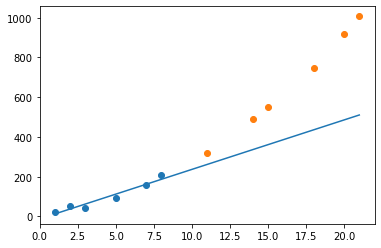

In [26]:
X_train = X.iloc[:X.size//2]
X_test = X.iloc[X.size//2:]
y_train = y[:len(y)//2]
y_test = y[len(y)//2:]
model13 = LinearRegression()
model13.fit(X_train, y_train)
print('intercept=', model13.intercept_, 'coefficient=', *model13.coef_)
y_train_pred = model13.predict(X_train)
print('train error', metrics.mean_squared_error(y_train,y_train_pred))
print('test error', metrics.mean_squared_error(y_test,model13.predict(X_test)))
xx = np.linspace(X.x.min(),X.x.max(),100)
yy = model13.predict(pd.DataFrame({'x': xx}))
plt.plot(xx,yy,'-')
plt.scatter(X_train.x, y_train)
plt.scatter(X_test.x, y_test)


## StatsModels LinearRegression

<font color=#C91414>***statsmodels.OLS***</font> is an alternative for scikit LinearRegression. It also provides significance test for intercept and each predictor.

fit() method fits a linear model using Ordinary Least Squares.   
You can see more details from [here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html). 




In [27]:
### stats model 
import statsmodels.api as sm
n = 1000
intercept = np.ones(n)
x1 = np.random.normal(loc=20,scale=10,size=n)
x2 = np.random.uniform(low=10, high=20, size=n)
x3 = np.random.exponential(scale=10, size=n)
e = np.random.normal(loc=0,scale=10,size=n)
y = 50 + 1*x1 + 2*x2 + 3*x3 + e
X = pd.DataFrame({'intercept': intercept, 'x1': x1, 'x2': x2, 'x3': x3})
ols = sm.OLS(endog=y, exog=X)
results = ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     3680.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:21:20   Log-Likelihood:                -3705.3
No. Observations:                1000   AIC:                             7419.
Df Residuals:                     996   BIC:                             7438.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     47.2505      1.840     25.678      0.0